In [200]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # python visualization library on top of matplotlib with easier interface for stats

# Import ML Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [201]:
data = pd.read_csv("Wholesale customers data.csv")
print(data.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [202]:
# descriptive stats
print("Dataset Info:")
print(data.info()) # Check data types and missing values

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


In [203]:
print(data.describe())

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

In [204]:
print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


## Data Distribution

array([[<Axes: title={'center': 'Channel'}>,
        <Axes: title={'center': 'Region'}>,
        <Axes: title={'center': 'Fresh'}>],
       [<Axes: title={'center': 'Milk'}>,
        <Axes: title={'center': 'Grocery'}>,
        <Axes: title={'center': 'Frozen'}>],
       [<Axes: title={'center': 'Detergents_Paper'}>,
        <Axes: title={'center': 'Delicassen'}>, <Axes: >]], dtype=object)

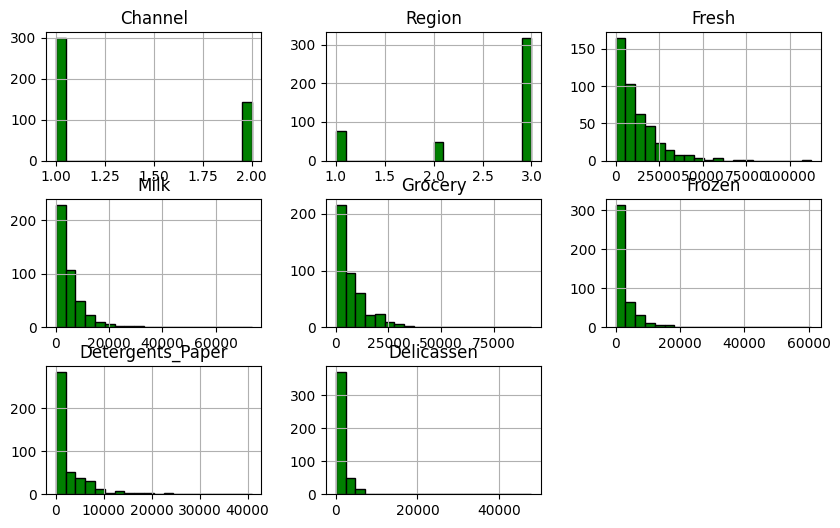

In [205]:
# Data Distribution
data.hist(bins=20, figsize=(10,6), color='green', edgecolor='black')

In [206]:
# Region looks incomplete with a lot of Others (3)
data["Region"].value_counts()
data = data.drop(['Region'], axis = 1) # axis = 1 is columns, axis = 0 is along rows 

<Axes: >

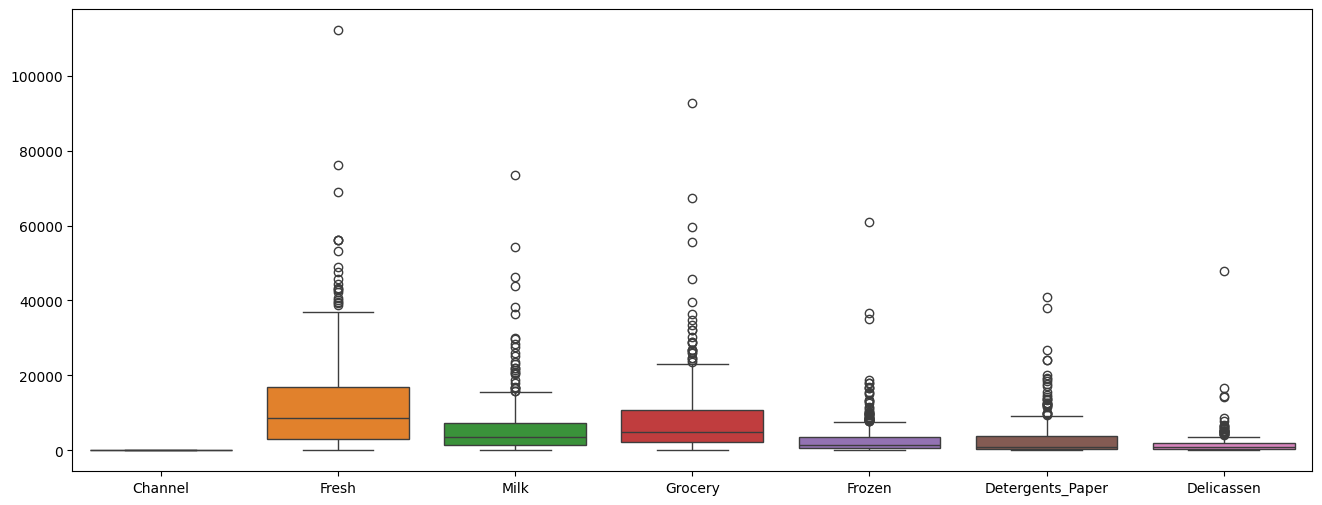

In [207]:
# Look for obvious outliers to remove them
plt.figure(figsize=(16,6))
sns.boxplot(data=data)

In [208]:
# Drop the outliers
data.drop(data.index[(data['Fresh']==112151) | (data['Milk']==73498) | (data['Grocery']==92780) | (data['Frozen']==60869) | (data['Delicassen']==47943)],inplace=True)

<Axes: >

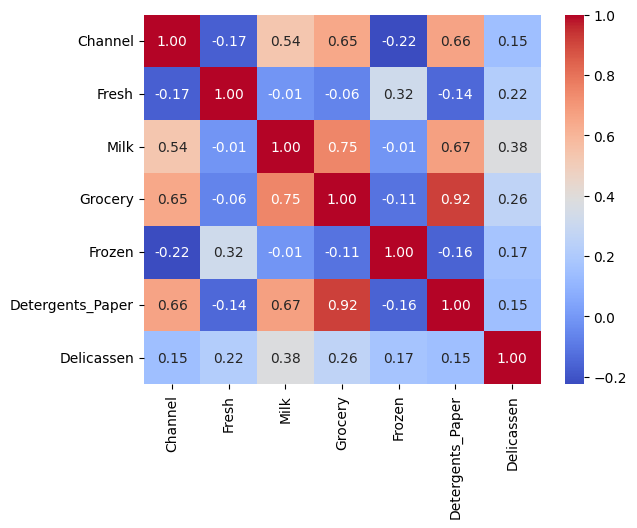

In [209]:
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
# annot: shows the correlation values also, not just colors
# fmt: controls numeric precision to two decimals 
# cmap: Changes the color scheme to show clear contrast between positive (red) and negative (blue) correlations.

## Create KMeans Model and Visualizations

In [210]:
# a) Select features for clustering
features = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]
X = data[features]

X_log = np.log1p(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_log)

In [211]:
pca = PCA(n_components=3, svd_solver="full", random_state=0)
# Solver Full in PCA tells scikit-learn to perform an exact singular value decomposition (SVD) of the data matrix.
# Using the full LAPACK linear-algebra routine rather than an approximate or randomized method.
data_pca = pca.fit_transform(X_scaled)

# d) Correct way to read variance explained
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", pca.explained_variance_ratio_.sum())

Explained variance ratio: [0.44249247 0.26404737 0.10892208]
Total explained variance: 0.8154619242772811


In [151]:
# We will have another analysis based on channel breakdown later
data.drop(['Channel'],axis=1, inplace=True)

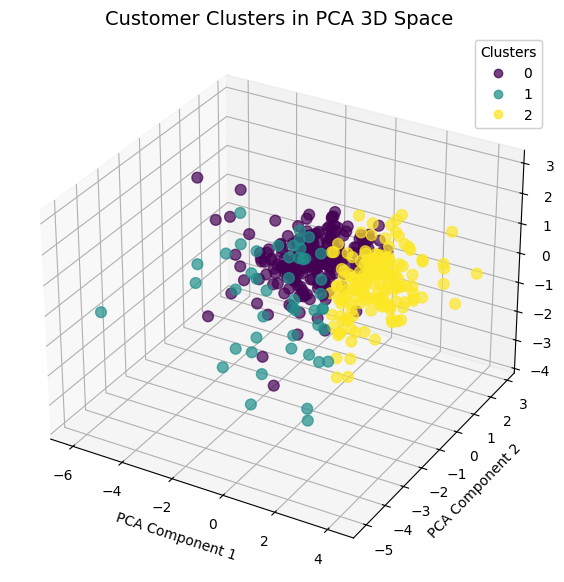

In [212]:
# --- b) 3D Scatter Plot of PCA Components ---

# Create a new figure for plotting, with width=10 inches and height=7 inches
fig = plt.figure(figsize=(10, 7))

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(data_pca)   # get cluster assignments

# Add a 3D subplot to the figure
# Parameters:
#   111 → means 1 row, 1 column, 1st subplot (a standard matplotlib code pattern)
#   projection='3d' → tells matplotlib this will be a 3D plot (using Axes3D)
ax = fig.add_subplot(111, projection='3d')

# plot each cluster in different color
# Plot data points in 3D space
# Parameters:
#   data_pca[:, 0] → x-axis values (PCA Component 1)
#   data_pca[:, 1] → y-axis values (PCA Component 2)
#   data_pca[:, 2] → z-axis values (PCA Component 3)
#   c=labels → assigns a color to each point based on its cluster label
#   cmap='viridis' → color map used to translate labels into colors
#   s=60 → size of each scatter point
#   alpha=0.7 → transparency (1 = solid, 0 = fully transparent)
scatter = ax.scatter(
    data_pca[:, 0], data_pca[:, 1], data_pca[:, 2],
    c=labels, cmap='viridis', s=60, alpha=0.7
)

ax.set_title("Customer Clusters in PCA 3D Space", fontsize=14)
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")

# color legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

## Elbow method (distortion/inertia)

[2610.0, 1815.3422520310698, 1539.1662056565692, 1365.8880089940171, 1245.8772841532964, 1158.3057110157097, 1114.4099872325496, 1013.2715903690503, 996.3437240416597]


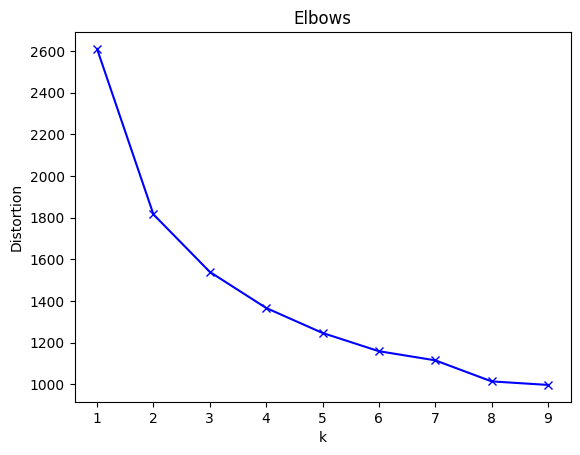

In [213]:
# Elbow method (distortion/inertia)

# import warnings
# warnings.filterwarnings("ignore", category=RuntimeWarning)

try:
    distortions = []
    K = range(1,10)
    for k in K:
        model = KMeans(n_clusters=k)
        model.fit(X_scaled)
        distortions.append(model.inertia_)
    print(distortions)
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbows')
    plt.show()
    
except ZeroDivisionError:
    # Code to execute if a ZeroDivisionError occurs
    print("Error: Cannot divide by zero!")

## Silhouette method

Silhouette scores: [np.float64(0.29077746669724347), np.float64(0.2539215527395531), np.float64(0.18738956157409165), np.float64(0.19983385011286445), np.float64(0.19397521754173971), np.float64(0.19926690876093617), np.float64(0.18652089110784562), np.float64(0.20187965439618957), np.float64(0.17315798451413328)]
Best k by silhouette: 2


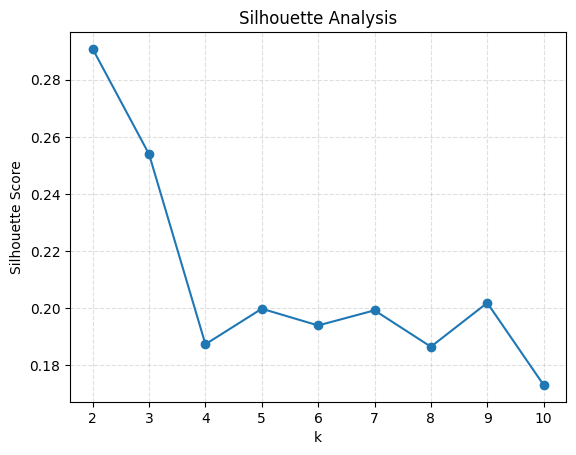

In [214]:
K = range(2, 11)
sil_scores = []

for k in K:
    km = KMeans(n_clusters=k, n_init=10, random_state=0, algorithm='lloyd')
    labels = km.fit_predict(X_scaled)     # or data_pca
    score = silhouette_score(X_scaled, labels, metric='euclidean')
    sil_scores.append(score)

best_k = K[int(np.argmax(sil_scores))]
print("Silhouette scores:", sil_scores)
print("Best k by silhouette:", best_k)

# plt.figure(figsize=(5, 3)) 
plt.plot(list(K), sil_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()